# Lab 1 Analysis Example using Thicket

In [12]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [13]:
tk = th.Thicket.from_caliperreader(glob("/home/stevenm27/435Project/caliper/cuda/strassen/*.cali", recursive=True))

In [14]:
# Performance data
tk.dataframe

nid   spot.channel  \
node                                        profile                          
{'name': 'comm', 'type': 'function'}        283233651     8  regionprofile   
                                            635361058     8  regionprofile   
                                            724433542     8  regionprofile   
                                            731557176     8  regionprofile   
                                            795218216     8  regionprofile   
                                            856058670     8  regionprofile   
                                            885563604     8  regionprofile   
                                            1147530862    8  regionprofile   
                                            1170903618    8  regionprofile   
                                            1463735340    8  regionprofile   
                                            1817460999    8  regionprofile   
                                            2051700019    8  regionprofile   
                                            2113091314    8  regionprofile   
                                            2130781912    8  regionprofile   
                                            2230292536    8  regionprofile   
                                            2271902797    8  regionprofile   
                                            2320482728    8  regionprofile   
                                            2380254095    8  regionprofile   
                                            2389954533    8  regionprofile   
                                            2824930421    8  regionprofile   
                                            2950682377    8  regionprofile   
                                            2982330849    8  regionprofile   
                                            3071630513    8  regionprofile   
                                            3212763313    8  regionprofile   
                                            3236633144    8  regionprofile   
                                            3361010756    8  regionprofile   
                                            3495651073    8  regionprofile   
                                            3501707462    8  regionprofile   
                                            3504624692    8  regionprofile   
                                            3606628309    8  regionprofile   
                                            3615505188    8  regionprofile   
                                            3656311714    8  regionprofile   
                                            3699764044    8  regionprofile   
                                            3763505612    8  regionprofile   
                                            3814550984    8  regionprofile   
                                            3940224771    8  regionprofile   
{'name': 'cudamemcpy', 'type': 'function'}  283233651     9  regionprofile   
                                            635361058     9  regionprofile   
                                            724433542     9  regionprofile   
                                            731557176     9  regionprofile   
                                            795218216     9  regionprofile   
                                            856058670     9  regionprofile   
                                            885563604     9  regionprofile   
                                            1147530862    9  regionprofile   
                                            1170903618    9  regionprofile   
                                            1463735340    9  regionprofile   
                                            1817460999    9  regionprofile   
                                            2051700019    9  regionprofile   
                                            2113091314    9  regionprofile   
                                            2130781912    9  regionprofile   


Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [15]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,
283233651,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t32-v256.cali,1699908317,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cuda, 32, 256]",g,CUDA Strass Matrix Multiplication,CUDA,int,4,256,32,8,8,Online
635361058,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t32-v4096.cali,1699908314,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cuda, 32, 4096]",g,CUDA Strass Matrix Multiplication,CUDA,int,4,4096,32,128,8,Online
724433542,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t8-v4096.cali,1699908274,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cuda, 8, 4096]",g,CUDA Strass Matrix Multiplication,CUDA,int,4,4096,8,512,8,Online
731557176,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t2-v2048.cali,1699908235,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cuda, 2, 2048]",g,CUDA Strass Matrix Multiplication,CUDA,int,4,2048,2,1024,8,Online
795218216,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t8-v128.cali,1699908265,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cuda, 8, 128]",g,CUDA Strass Matrix Multiplication,CUDA,int,4,128,8,16,8,Online
856058670,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t2-v512.cali,1699908235,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cuda, 2, 512]",g,CUDA Strass Matrix Multiplication,CUDA,int,4,512,2,256,8,Online
885563604,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t32-v2048.cali,1699908314,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cuda, 32, 2048]",g,CUDA Strass Matrix Multiplication,CUDA,int,4,2048,32,64,8,Online
1147530862,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t8-v2048.cali,1699908275,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cuda, 8, 2048]",g,CUDA Strass Matrix Multiplication,CUDA,int,4,2048,8,256,8,Online
1170903618,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t16-v512.cali,1699908294,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cuda, 16, 512]",g,CUDA Strass Matrix Multiplication,CUDA,int,4,512,16,32,8,Online


In [16]:
gb = tk.groupby("num_threads")

6  thickets created...
{1: <thicket.thicket.Thicket object at 0x2ba07789c310>, 2: <thicket.thicket.Thicket object at 0x2ba077917280>, 4: <thicket.thicket.Thicket object at 0x2ba07790e6d0>, 8: <thicket.thicket.Thicket object at 0x2ba077850340>, 16: <thicket.thicket.Thicket object at 0x2ba07784e6a0>, 32: <thicket.thicket.Thicket object at 0x2ba077d43370>}


Compose these 3 groups column-wise to get a holistic view of the data

ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

Perform pandas operations to get the table in a desirable format for plotting

In [17]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="InputSize"
)

# Drop unwanted columns
array = [("node","")]
for i in (1,2,4,8,16,32):
    array.append((i,"nid"))
    array.append((i,"spot.channel"))
    
    #comment out the one you want to plot
    array.append((i, 'Min time/rank'))
    array.append((i, 'Max time/rank'))
#     array.append((i, 'Avg time/rank'))
    array.append((i, 'Total time'))
    array.append((i, 'Avg GPU time/rank'))
    array.append((i, 'Min GPU time/rank'))
    array.append((i, 'Max GPU time/rank'))
    array.append((i, 'Max GPU time/rank'))
    array.append((i, 'Total GPU time'))

ctk.dataframe = ctk.dataframe.reset_index().drop(array, axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])
# Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [18]:
ctk.dataframe.columns

MultiIndex([( 1, 'Avg time/rank'),
            ( 2, 'Avg time/rank'),
            ( 4, 'Avg time/rank'),
            ( 8, 'Avg time/rank'),
            (16, 'Avg time/rank'),
            (32, 'Avg time/rank')],
           )

In [19]:
ctk.dataframe

1             2             4             8  \
                      Avg time/rank Avg time/rank Avg time/rank Avg time/rank   
name        InputSize                                                           
comm        128            0.000812      0.000945      0.000944      0.000975   
            256            0.001413      0.001304      0.001281      0.001279   
            512            0.002549      0.002542      0.002582      0.002532   
            1024           0.007863      0.008002      0.007943      0.008272   
            2048           0.024910      0.024540      0.025512      0.025227   
            4096           0.094219      0.095918      0.098231      0.094463   
cudamemcpy  128            0.000568      0.000669      0.000665      0.000690   
            256            0.001115      0.001058      0.001034      0.001033   
            512            0.002279      0.002259      0.002316      0.002270   
            1024           0.007534      0.007683      0.007630      0.007884   
            2048           0.024486      0.024153      0.025035      0.024779   
            4096           0.093698      0.095266      0.097560      0.093916   
comp        128            0.001944      0.001867      0.001787      0.001869   
            256            0.005569      0.004419      0.003532      0.003552   
            512            0.031816      0.015410      0.012331      0.010608   
            1024           0.183608      0.095190      0.051215      0.041778   
            2048           1.232601      0.492498      0.237020      0.161946   
            4096           9.433008      2.832121      1.069231      0.729052   
comp_large  128            0.000119      0.000124      0.000124      0.000126   
            256            0.000399      0.000399      0.000394      0.000394   
            512            0.001494      0.001505      0.001524      0.001497   
            1024           0.005356      0.004739      0.005287      0.005303   
            2048           0.018650      0.018720      0.018754      0.018718   
            4096           0.074524      0.074459      0.074629      0.074344   
combine     128            0.000105      0.000109      0.000108      0.000109   
            256            0.000383      0.000384      0.000380      0.000380   
            512            0.001477      0.001478      0.001506      0.001481   
            1024           0.005332      0.004717      0.005267      0.005278   
            2048           0.018618      0.018684      0.018718      0.018687   
            4096           0.074480      0.074417      0.074581      0.074285   
comp_small  128            0.001521      0.001391      0.001320      0.001394   
            256            0.004822      0.003713      0.002818      0.002846   
            512            0.029936      0.013573      0.010483      0.008786   
            1024           0.177900      0.090099      0.045578      0.036072   
            2048           1.213551      0.473414      0.217830      0.142812   
            4096           9.358071      2.757242      0.994126      0.654304   
addsub      128            0.000418      0.000430      0.000427      0.000449   
            256            0.001377      0.001340      0.001326      0.001340   
            512            0.005913      0.004939      0.004959      0.004947   
            1024           0.019335      0.019319      0.019298      0.019507   
            2048           0.078557      0.078922      0.077455      0.079065   
            4096           0.320423      0.310262      0.312854      0.314098   
multi       128            0.000656      0.000482      0.000410      0.000470   
            256            0.002476      0.001439      0.000570      0.000591   
            512            0.018457      0.005740      0.002657      0.000959   
            1024           0.147686      0.059995      0.015451      0.005384   
            2048           1.097859      0.358751      0.103558  

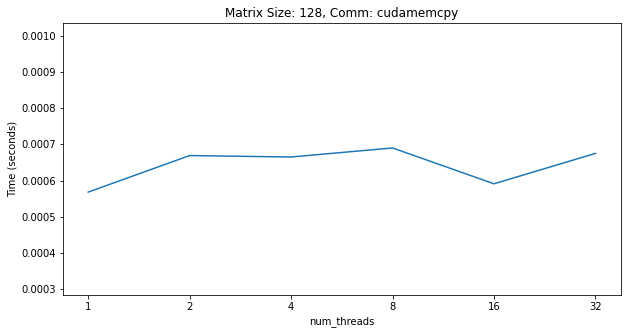

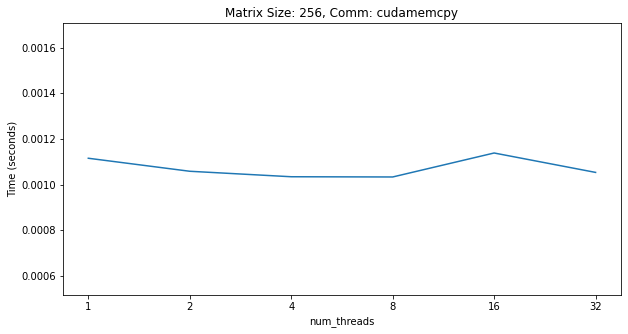

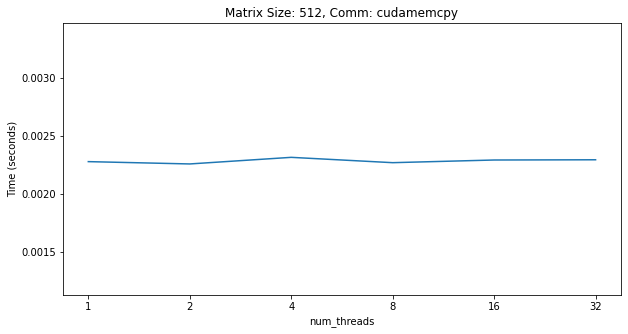

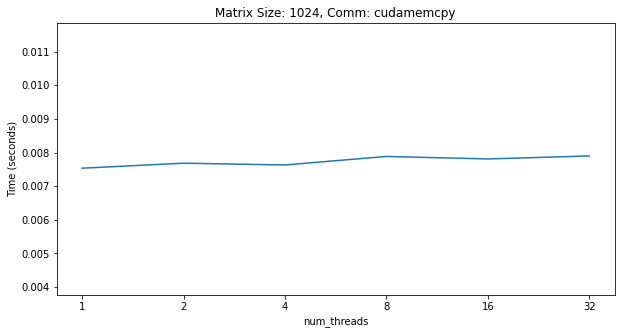

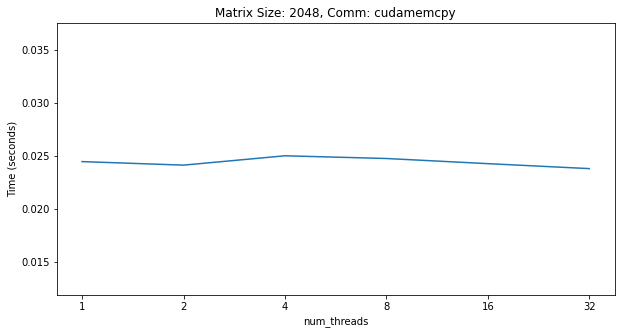

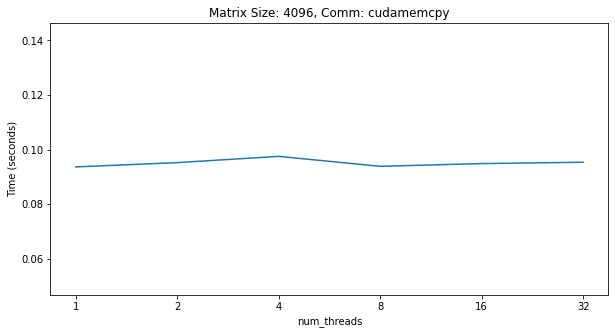

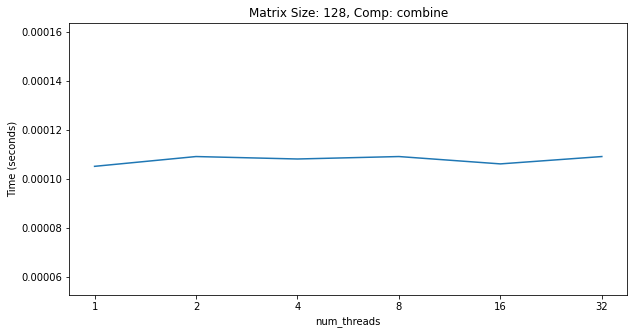

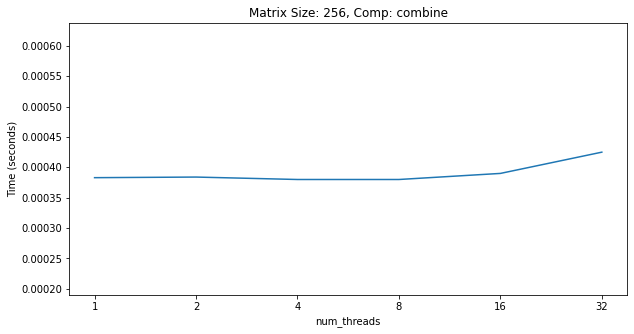

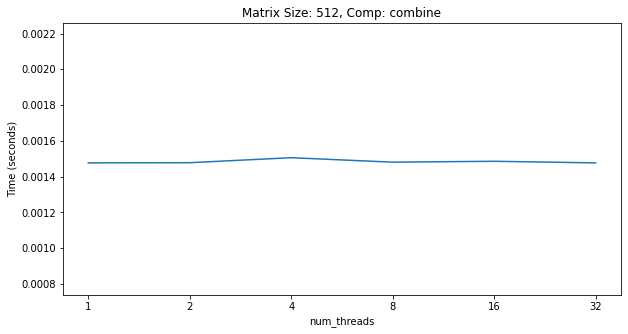

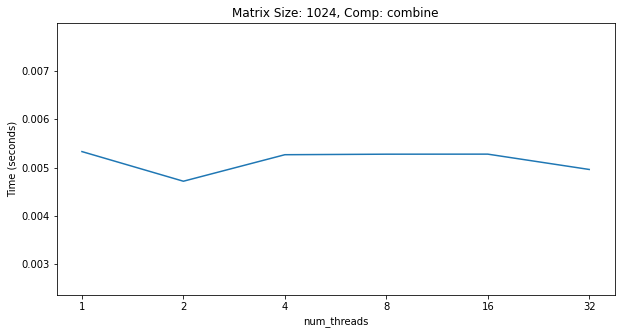

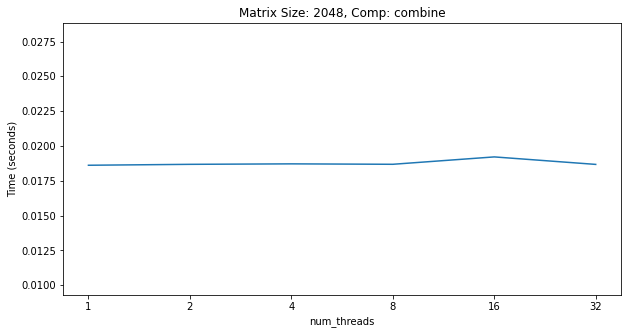

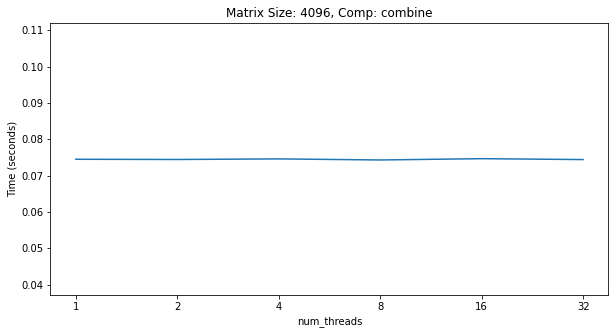

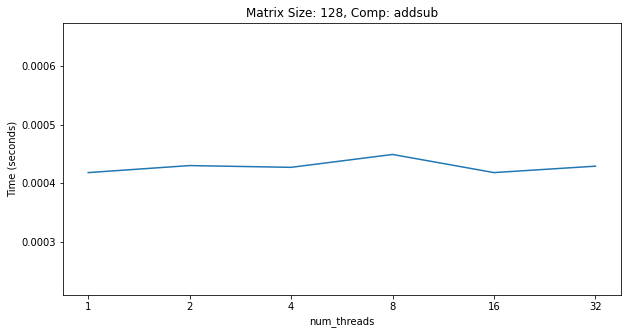

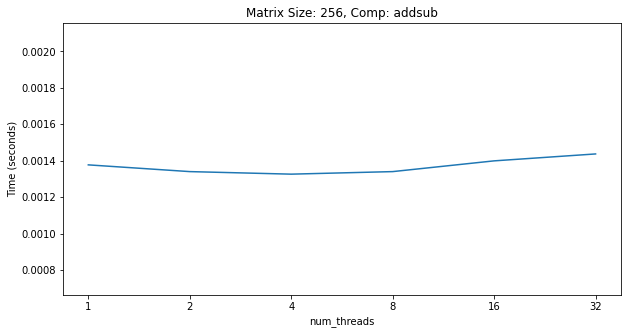

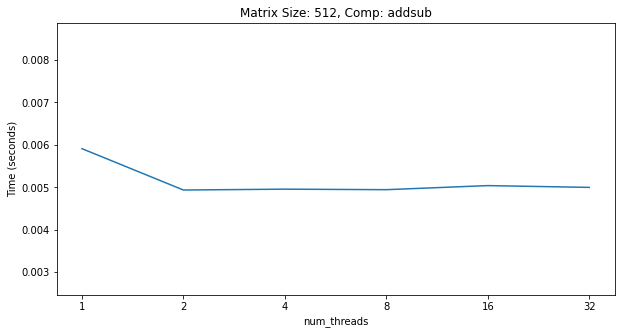

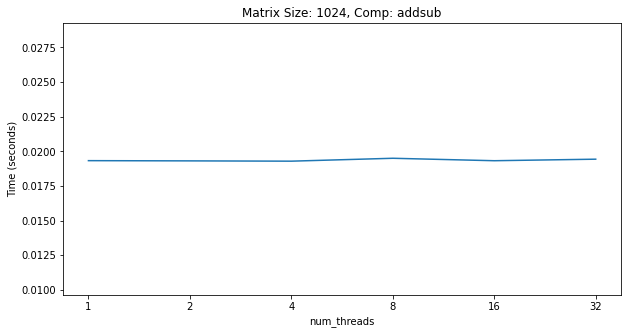

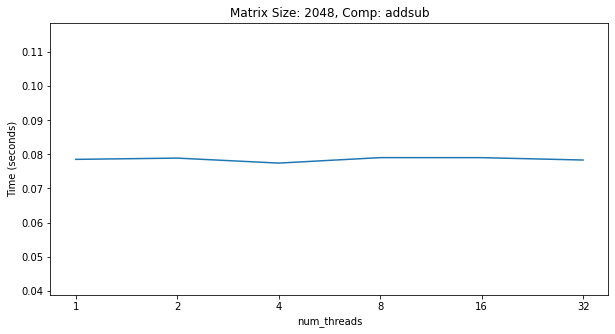

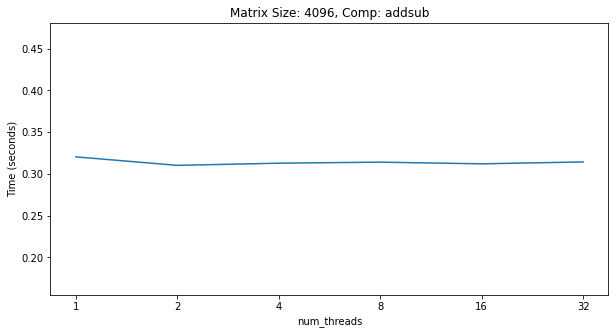

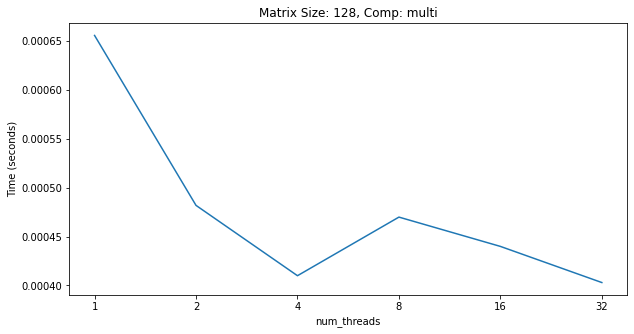

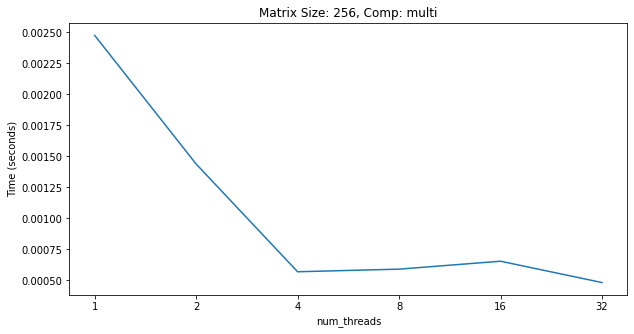

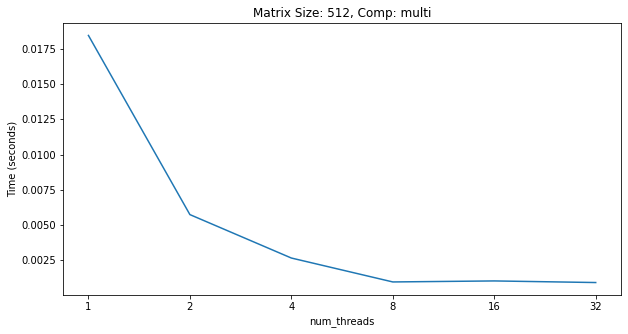

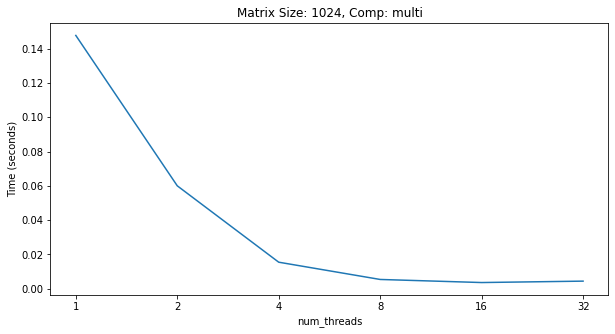

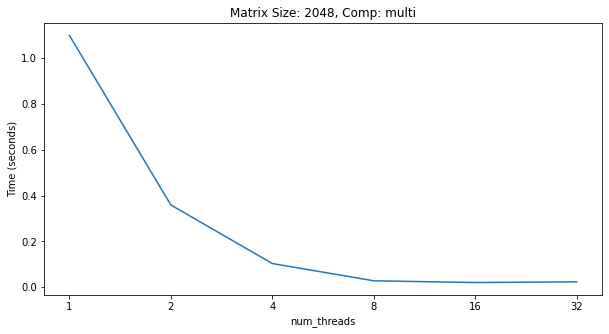

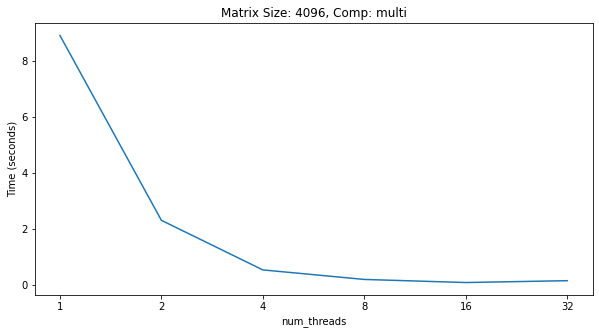

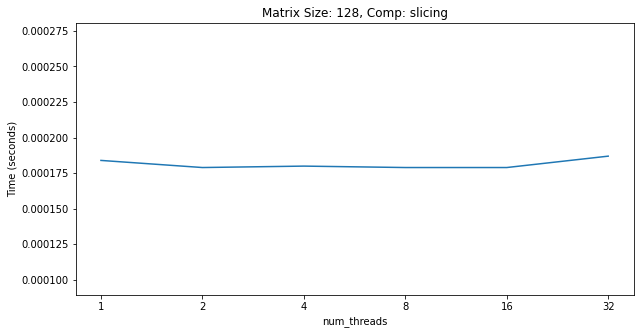

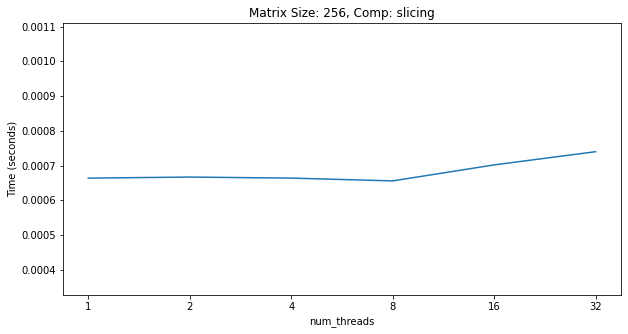

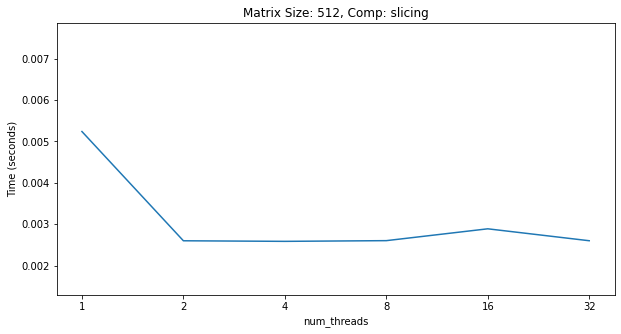

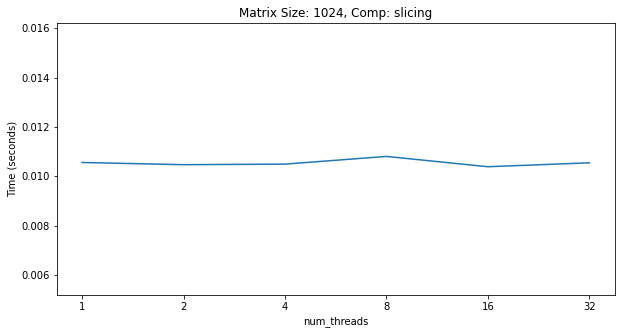

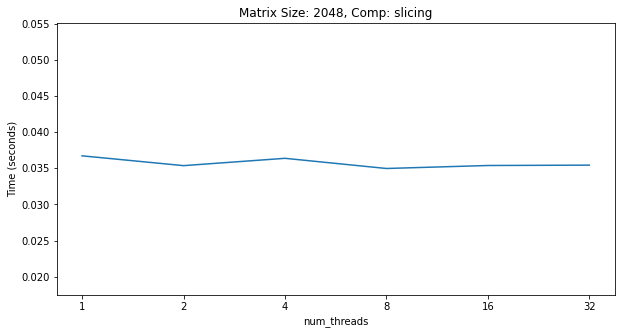

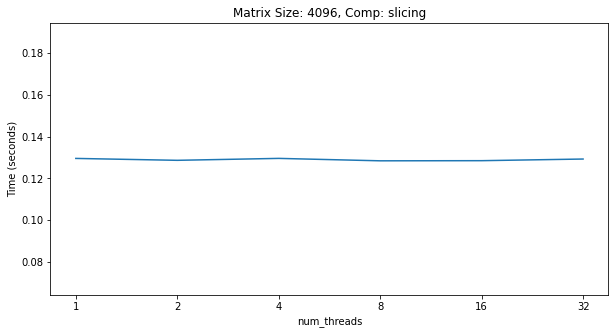

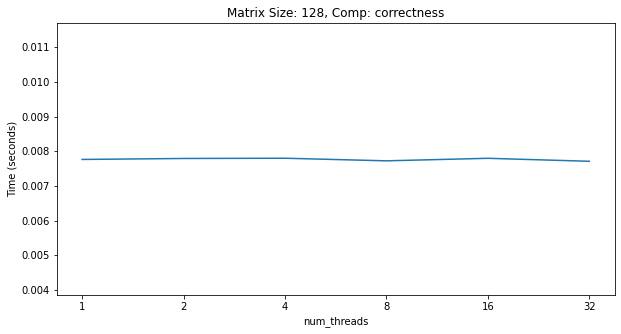

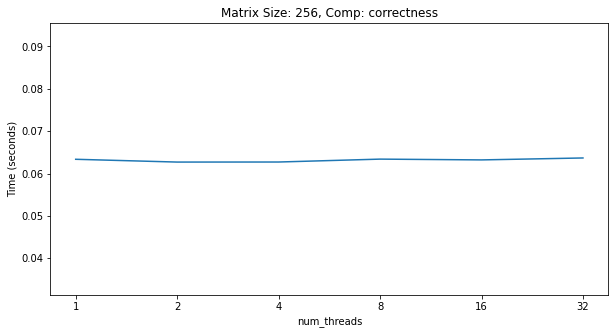

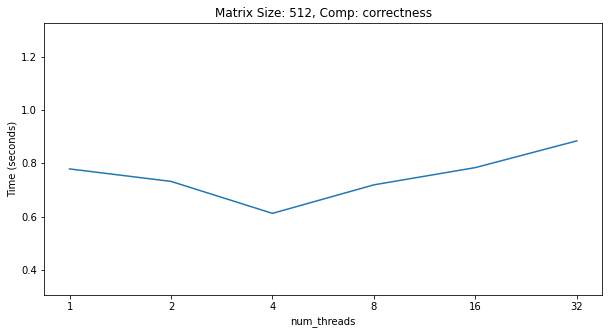

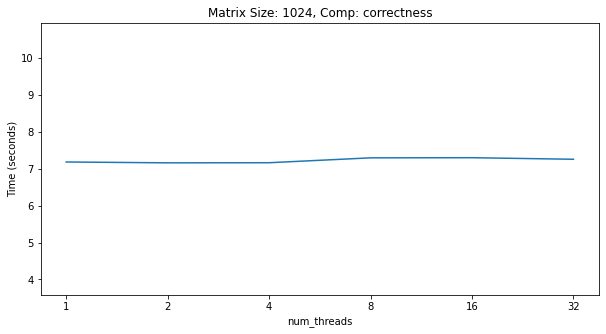

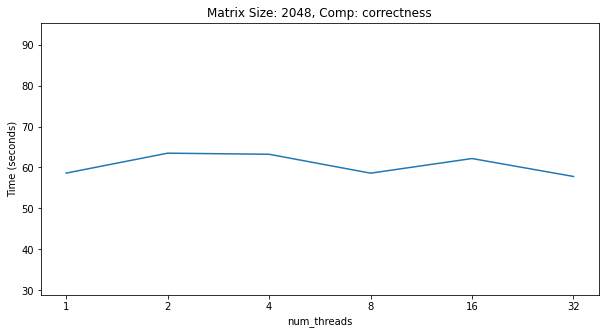

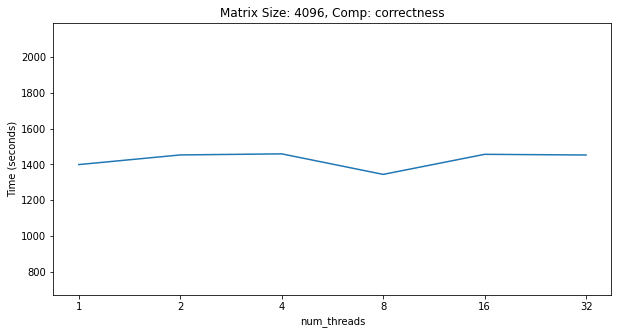

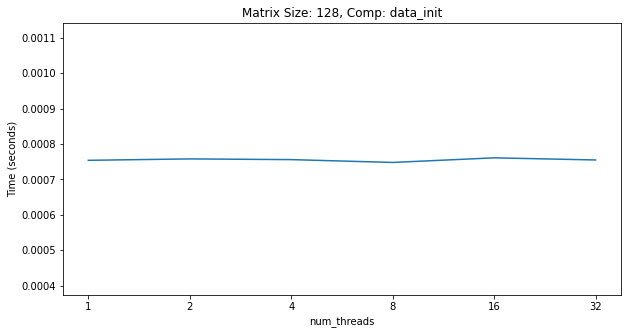

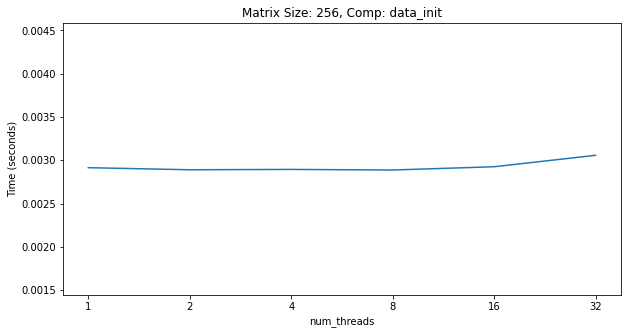

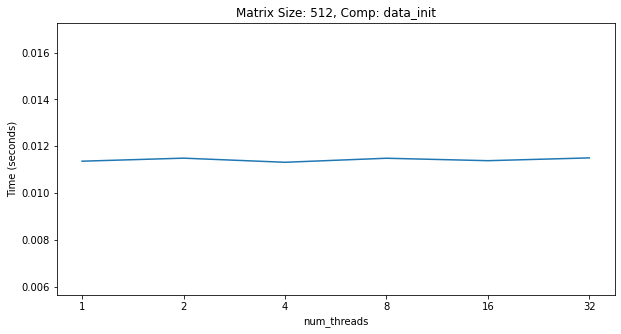

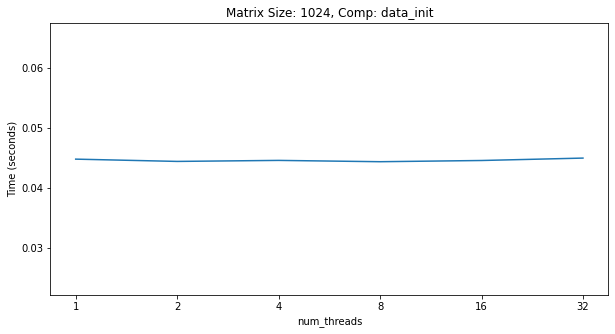

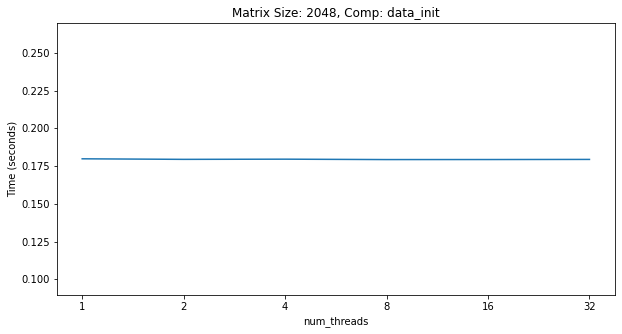

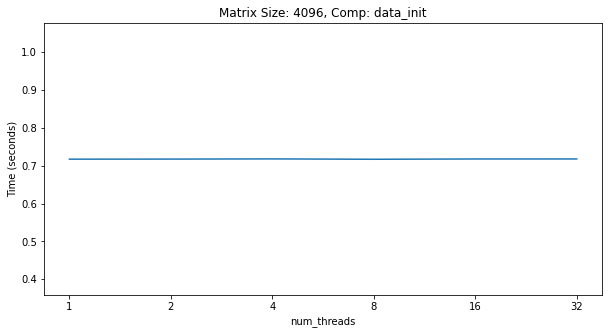

In [22]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
df = ctk.dataframe

# Define the matrix sizes you want to plot
matrix_sizes = [128, 256, 512, 1024, 2048, 4096]

# Define the data series
comm = ["cudamemcpy"]
comp = ["combine", "addsub", "multi", "slicing", "correctness", "data_init"]

# Loop through matrix sizes and data series for 'comm'
for i, matrix_size in enumerate(matrix_sizes):
    for j, data_series in enumerate(comm):
        plt.figure(figsize=(10, 5))  # Create a new figure for each plot
        ax = plt.gca()
        data = df.loc[(data_series, matrix_size), :]
        data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
        data.plot(ax=ax, title=f'Matrix Size: {matrix_size}, Comm: {data_series}')
        ax.set_xlabel("num_threads")
        ax.set_ylabel("Time (seconds)")
        plt.show()

# Loop through matrix sizes and data series for 'comp'
for j, data_series in enumerate(comp):
    for i, matrix_size in enumerate(matrix_sizes):
        plt.figure(figsize=(10, 5))  # Create a new figure for each plot
        ax = plt.gca()
        data = df.loc[(data_series, matrix_size), :]
        data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
        data.plot(ax=ax, title=f'Matrix Size: {matrix_size}, Comp: {data_series}')
        ax.set_xlabel("num_threads")
        ax.set_ylabel("Time (seconds)")
        plt.show()


In [50]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

KeyError: 'Level num_procs not found'

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [46]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [47]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [48]:
ctk.dataframe.loc["main"]

4                                           \
          Min time/rank Max time/rank Avg time/rank   Total time   
InputSize                                                          
128            0.392027      0.398540      0.393913     1.575651   
256            0.346411      0.400129      0.360285     1.441141   
512            0.500207      0.958925      0.615386     2.461545   
1024           1.937511      7.917518      3.432799    13.731198   
2048          16.257582     80.443053     32.304383   129.217530   
4096         328.697990   1675.564007    665.414500  2661.657998   

                                         8                              \
          Variance time/rank Min time/rank Max time/rank Avg time/rank   
InputSize                                                                
128                 0.000007      0.433096      0.440360      0.434221   
256                 0.000529      0.492410      0.554987      0.503490   
512                 0.039340      0.529886      1.233589      0.620466   
1024                6.704234      1.325889      7.550431      2.105368   
2048              772.443856      8.460777     69.807645     16.129681   
4096           340134.008948    179.716693   1563.045031    352.633664   

                                                     16                \
            Total time Variance time/rank Min time/rank Max time/rank   
InputSize                                                               
128           3.473769           0.000005      6.131866      9.241619   
256           4.027923           0.000395      0.508943      0.568770   
512           4.963731           0.053707      0.520784      1.136749   
1024         16.842943           4.235534      0.951594      6.832092   
2048        129.037449         411.617690      4.591423     65.259147   
4096       2821.069309      209299.382431     94.743396   1454.893124   

                                                                   32  \
          Avg time/rank   Total time Variance time/rank Min time/rank   
InputSize                                                               
128            7.685408   122.966527           2.398687      6.152744   
256            0.518767     8.300279           0.000184      0.574143   
512            0.564259     9.028137           0.021859      0.522779   
1024           1.323841    21.181450           2.022738      0.701745   
2048           8.386800   134.188794         215.630935      2.819830   
4096         179.756225  2876.099606      108398.274082     45.091347   

                                                                       \
          Max time/rank Avg time/rank   Total time Variance time/rank   
InputSize                                                               
128            9.262938      6.933099   221.859167           1.797111   
256            0.643461      0.589362    18.859579           0.000127   
512            1.005280      0.548887    17.564379           0.006770   
1024           7.764880      0.928738    29.719625           1.507534   
2048          66.892633      5.492441   175.758118         121.681125   
4096        1445.773181     88.866504  2843.728124       59393.410687   

                     64                                           \
          Min time/rank Max time/rank Avg time/rank   Total time   
InputSize                                                          
128            6.139745      9.087473      6.514431   416.923586   
256            3.180303      3.679889      3.591665   229.866588   
512            0.460709      1.103177      0.518809    33.203748   
1024          19.128636     29.219222     22.336157  1429.514063   
2048           2.269738     62.094665      3.961659   253.546177   
4096          23.617032   1422.557660     45.483347  2910.934204   

                                       128                              \
          Variance time/rank Min time/rank Max time/rank Avg time/rank   
InputSi

In [49]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

NameError: name 'function_names' is not defined

In [ ]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="num_procs",
        ylabel="Time (seconds)",
    )

## Speedup

In [ ]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )